# Proyecto Final UD2
#### UD2. Aprendizaxe Supervisada
#### MP. Sistemas de Aprendizaxe Automáticos
#### IES de Teis (Vigo), Cristina Gómez Alonso

En este proyecto, los alumnos del módulo de Machine Learning deberán demostrar los conocimientos adquiridos durante la UD2 y aplicar al menos dos algoritmos diferentes de aprendizaje supervisado vistos en clase (KNN, Regresión Lineal, Regresión Logística, Árboles de Decisión (o Randm Forest), SVM).

Para ello, tomaremos como referencia el dataset credit_train.csv y credit_test.csv que contienen la información sobre una campaña de márketing llevada a cabo mediante llamadas teléfonicas para captar clientes que quieran acceder a un crédito.

**Features o Input variables:**

1 - age: edad numérica

2 - job : tipo de trabajo (puede tomar los valores: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : estado civil (puede tomar los valores: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education : nivel de estudios (puede tomar los valores: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: ya tiene un crédito solicitado por defecto? (puede tomar los valores: 'no','yes','unknown')

6 - housing: tiene hipoteca? (puede tomar los valores: 'no','yes','unknown')

7 - loan: tiene una cuenta personal? (puede tomar los valores: 'no','yes','unknown')

8 - contact: tipo de comunicación de contacto (puede tomar los valores: 'cellular','telephone')

9 - month: último mes de contacto (puede tomar los valores: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: último día de la semana en el que se le ha contactado (puede tomar los valores: 'mon','tue','wed','thu','fri')

11 - duration: duración del último contacto en segundos (numérico). Importante: este atributo afecta en gran medida a la salida ya que si duration es 0, entonces  la salida es 'no')

12 - campaign: número de veces que se le ha contactado durante la campaña a este cliente (numérico, incluye el último contacto)

13 - pdays: número de días que han pasado desde que el cliente fue contactado por última vez(numérico; 999 significa que no ha sido contactado anteriormente)

14 - previous: número de contactos anteriores a esta campaña a este cliente(numérico)

15 - poutcome: resultado de la última campaña de marketing (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - quarterly indicator (numérico)

17 - cons.price.idx: IPC - indicador mensual (numérico)

18 - cons.conf.idx: índice de confianza de los consumidores - indicador mensual (numérico)

19 - euribor3m: euribor tasa 3 meses - indicador diario (numérico)

20 - nr.employed: número de trabajadores - indicador en porciones  (numérico)

**Output variable (desired target):**

21 - y: Suscripción al crédito por parte del cliente? (binary: 'yes','no')

Los requisitos mínimos de este proyecto consisten en:

* Etapas comunes 1, 2 y 3 de importación, análisis numérico y visual, así como preprocesado.
* Para cada algoritmo que apliques deberás de mantener la siguiente estructura de 5 etapas (del 4-8), pero puedes añadir subapartados o etapas adicionales.
* En cada etapa se deben añadir explicaciones justificativas de lo que se quiere hacer, así como de los resultados obtenidos.
* Como resultado final, se deben contrastar los resultados obtenidos y comparar los algoritmos utilizados indicando claramente cual y porqué obtiene mejor resultados.

Cualificaciones:
- Uso de 2 algoritmos: cualificación máxima de 7 puntos
- Uso de 3 algoritmos: cualificación máxima de 10 puntos.




## 1. Importación de paquetes y dataset

Importación del dataset y las librerias que utilizaremos en nuestro proyecto

In [74]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report, confusion_matrix

df_credit_test = pd.read_csv('credit-test.csv')
df_credit_train = pd.read_csv('credit-train.csv')

## 2.EDA y Visual EDA

In [75]:
#Dataframe de test
df_credit_test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8


In [76]:
#Dataframe de train
df_credit_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [77]:
#Datos del dataframe
df_credit_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [78]:
#Datos del dataframe
df_credit_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp_var_rate    4119 non-null   float64
 16  cons_price_idx  4119 non-null   float64
 17  cons_conf_idx   4119 non-null   f

In [79]:
#Mostramos las columnas del dataframe que utilizaremos para entrenar
df_credit_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [80]:
#Mostramos las columnas del dataframe que utilizaremos para el testeo
df_credit_test.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed'],
      dtype='object')

## 3. Preprocessing data


### Primero observaremos si hay valores nulos en nuestros datasets

In [81]:
df_credit_train.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

### Se puede observar como no existen valores nulos

In [82]:
df_credit_test.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
dtype: int64

### Se puede observar que no existen valores nulos

#### Como no hay valores Nan no se trataran

### Tratamiento de datos categóricos

In [83]:
# Pasamos todos los datos que son categóricas a valores numéricos
cat_cols = ['default', 'housing', 'loan','contact','job','marital','education','month','poutcome']
df_credit_train[cat_cols] = df_credit_train[cat_cols].astype('category')
df_credit_train[cat_cols] = df_credit_train[cat_cols].apply(lambda x: x.cat.codes)
df_credit_test[cat_cols] = df_credit_test[cat_cols].astype('category')
df_credit_test[cat_cols] = df_credit_test[cat_cols].apply(lambda x: x.cat.codes)

In [84]:
#Eliminamos la columna day_of_week ya que no aporta mucha mas información a nuestros algoritmos
to_drop = ['day_of_week']
df_credit_train = df_credit_train.drop(to_drop,axis=1)
df_credit_test = df_credit_test.drop(to_drop,axis=1)

In [85]:
#Dataframe que utilizaremos para el train
df_credit_train

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,1,1,0,1,2,0,0,1,210,1,999,0,1,1.4,93.444,-36.1,4.963,5228.1,0
1,53,9,1,7,0,0,0,0,7,138,1,999,0,1,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,4,2,6,0,2,0,0,4,339,3,6,2,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,7,1,3,0,0,0,0,0,185,2,999,0,1,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,5,1,0,0,2,0,0,1,137,1,3,1,2,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,5,1,3,1,0,2,1,4,222,1,999,0,1,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,3,1,0,1,0,0,1,6,196,2,999,0,1,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,0,2,6,1,2,2,1,6,62,3,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,9,1,5,0,0,2,1,8,200,2,999,0,1,-3.4,92.431,-26.9,0.742,5017.5,0


In [86]:
#Dataframe que utilizaremos para el test
df_credit_test

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,30,1,1,2,0,2,0,0,6,487,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1
1,39,7,2,3,0,0,0,1,6,346,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0
2,25,7,1,3,0,2,0,1,4,227,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1
3,38,7,1,2,0,1,1,1,4,17,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1
4,47,0,1,6,0,2,0,0,7,58,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,0,1,1,0,2,2,0,3,53,1,999,0,1,1.4,93.918,-42.7,4.958,5228.1
4115,39,0,1,3,0,2,0,1,3,219,1,999,0,1,1.4,93.918,-42.7,4.959,5228.1
4116,27,8,2,3,0,0,0,0,6,64,2,999,1,0,-1.8,92.893,-46.2,1.354,5099.1
4117,58,0,1,3,0,0,0,0,1,528,1,999,0,1,1.4,93.444,-36.1,4.966,5228.1


# 1º Método Logistic Regression

## 1. Creación del modelo y división del dataset

In [87]:
#Dividimos el modelo para crear la x y la y para los train y tests

#La x seran todas la columnas menos la columna y 
x = df_credit_train.loc[:, df_credit_train.columns != 'y'].values
#La y será solo la columna y
y = df_credit_train.loc[:, 'y'].values
#Creamos los trin y test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=42)

In [88]:
#Mostramos los shape
print("Training set shape", x_train.shape)
print("Test set shape", x_test.shape)

Training set shape (30891, 19)
Test set shape (10297, 19)


#### Como se puede observar en la parte de training el split se ha divido de tal manera que tendremos 30891 muestras para el train con 19 atributos y 109297 muestras para el test con los mismos atributios

## 2. Entrenamiento

In [89]:
#Creamos el modelo de regresión logistica
clf = LogisticRegression(random_state=0, penalty='l2', solver='lbfgs',max_iter=100)

In [90]:
#Entrenamiento
clf.fit(x_train, y_train)

c:\Users\34658\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

## 3. Análisis de resultados/Score

In [91]:
# Mostramos el score de el algoritmo.
print('Score: {}'.format(clf.score(x_test, y_test)))

Score: 0.9046324172088958


### Se puede observar que hemos conseguido un score de 0.90 lo cual es aceptable

## 4. Realización de predicciones

In [92]:
# Umbral para la decisión
prob_th = 0.5
#Creamos un dataframe nuevo con las predicciones
prob_df=pd.DataFrame(clf.predict_proba(x_test[:10]),columns=['Prob of NO','Prob of YES'])
prob_df['Decision']=(prob_df['Prob of YES']>prob_th).apply(int)
#Dataframe de predicciones
prob_df

,Prob of NO,Prob of YES,Decision
0,0.969036,0.030964,0
1,0.953728,0.046272,0
2,0.479057,0.520943,1
3,0.979818,0.020182,0
4,0.985660,0.014340,0
5,0.943098,0.056902,0
6,0.972694,0.027306,0
7,0.925966,0.074034,0
8,0.988566,0.011434,0
9,0.857221,0.142779,0


In [93]:
# Unimos el dataframe que contiene el score con el dataframe de train
new_df=df_credit_test.join(prob_df, how='inner')  
#Mostramos el dataframe
new_df

,age,job,marital,education,default,housing,loan,contact,month,duration,...,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,Prob of NO,Prob of YES,Decision
0,30,1,1,2,0,2,0,0,6,487,...,0,1,-1.8,92.893,-46.2,1.313,5099.1,0.969036,0.030964,0
1,39,7,2,3,0,0,0,1,6,346,...,0,1,1.1,93.994,-36.4,4.855,5191.0,0.953728,0.046272,0
2,25,7,1,3,0,2,0,1,4,227,...,0,1,1.4,94.465,-41.8,4.962,5228.1,0.479057,0.520943,1
3,38,7,1,2,0,1,1,1,4,17,...,0,1,1.4,94.465,-41.8,4.959,5228.1,0.979818,0.020182,0
4,47,0,1,6,0,2,0,0,7,58,...,0,1,-0.1,93.200,-42.0,4.191,5195.8,0.985660,0.014340,0
5,32,7,2,6,0,0,0,0,9,128,...,2,0,-1.1,94.199,-37.5,0.884,4963.6,0.943098,0.056902,0
6,32,0,2,6,0,2,0,0,9,290,...,0,1,-1.1,94.199,-37.5,0.879,4963.6,0.972694,0.027306,0
7,41,2,1,6,1,2,0,0,7,44,...,0,1,-0.1,93.200,-42.0,4.191,5195.8,0.925966,0.074034,0
8,31,7,0,5,0,0,0,0,7,68,...,1,0,-0.1,93.200,-42.0,4.153,5195.8,0.988566,0.011434,0
9,35,1,1,2,1,0,0,1,6,170,...,0,1,1.1,93.994,-36.4,4.855,5191.0,0.857221,0.142779,0


## 5. Matriz de confusión e informe de clasificación 

In [94]:
print(confusion_matrix(y_test, clf.predict(x_test)))

[[8839  272]
 [ 710  476]]


In [95]:
print(classification_report(y_test, clf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      9111
           1       0.64      0.40      0.49      1186

    accuracy                           0.90     10297
   macro avg       0.78      0.69      0.72     10297
weighted avg       0.89      0.90      0.89     10297



## 6. Visualización

C:\Users\34658\AppData\Local\Temp\ipykernel_8928\1950995529.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_decision_counts = new_df.groupby([pd.cut(new_df['age'], bins=age_bins), 'Decision']).size().unstack(fill_value=0)


<Figure size 1000x600 with 0 Axes>

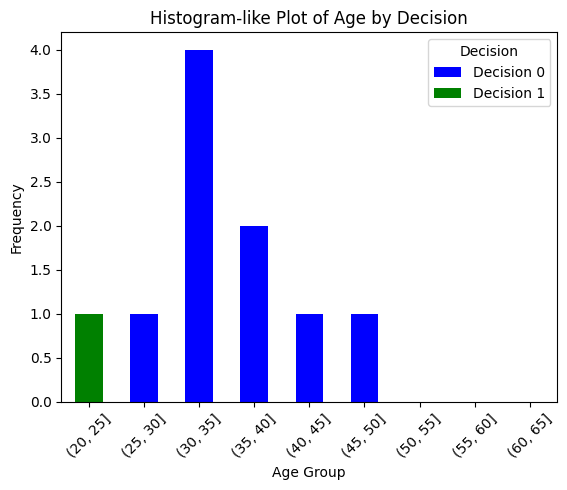

In [96]:
age_bins = range(20, 70, 5)  

age_decision_counts = new_df.groupby([pd.cut(new_df['age'], bins=age_bins), 'Decision']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))


age_decision_counts.plot(kind='bar', stacked=True, color=['blue', 'green'])


plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Histogram-like Plot of Age by Decision')
plt.xticks(rotation=45)
plt.legend(title='Decision', labels=['Decision 0', 'Decision 1'])


plt.show()

### Con está gráfica se puede observar que tras realizar las predicciones solo las personas de la edad comprendida entre 20 y 25 se subscribieron mientras que las personas mayores de 25 no se subscribieron. 

# 2º KNN

## 1. Preparación de los datos

In [97]:
# Misma operación que utilizamos para el modelo de logistic regresion
x = df_credit_train.loc[:, df_credit_train.columns != 'y'].values
y = df_credit_train.loc[:, 'y'].values

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)
scaler = MinMaxScaler()
X_train

array([[ 3.6000e+01,  2.0000e+00,  2.0000e+00, ..., -4.2000e+01,
         4.1200e+00,  5.1958e+03],
       [ 4.6000e+01,  4.0000e+00,  1.0000e+00, ..., -4.7100e+01,
         1.4050e+00,  5.0991e+03],
       [ 3.0000e+01,  1.0000e+00,  2.0000e+00, ..., -3.6400e+01,
         4.8570e+00,  5.1910e+03],
       ...,
       [ 3.1000e+01,  9.0000e+00,  1.0000e+00, ..., -4.1800e+01,
         4.9620e+00,  5.2281e+03],
       [ 2.9000e+01,  1.0000e+00,  1.0000e+00, ..., -4.6200e+01,
         1.3130e+00,  5.0991e+03],
       [ 3.3000e+01,  9.0000e+00,  0.0000e+00, ..., -4.1800e+01,
         4.8640e+00,  5.2281e+03]])

## 2. Creación del modelo, entrenamiento y evaluación

In [98]:
# Nº de neightberhoods que utilizaremos
n_neighbors = 3

# Adiestramos el algoritmos y mostramos el accuracy 
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
      .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
      .format(knn.score(X_test, y_test)))

X_test

Accuracy of K-NN classifier on training set: 0.94
Accuracy of K-NN classifier on test set: 0.90


array([[ 5.1000e+01,  1.0000e+00,  1.0000e+00, ..., -4.7100e+01,
         1.4050e+00,  5.0991e+03],
       [ 3.1000e+01,  9.0000e+00,  1.0000e+00, ..., -4.7100e+01,
         1.4660e+00,  5.0991e+03],
       [ 3.3000e+01,  1.0000e+00,  2.0000e+00, ..., -4.2700e+01,
         4.9620e+00,  5.2281e+03],
       ...,
       [ 3.4000e+01,  1.0000e+00,  1.0000e+00, ..., -4.2700e+01,
         4.9620e+00,  5.2281e+03],
       [ 5.3000e+01,  0.0000e+00,  1.0000e+00, ..., -4.6200e+01,
         1.2500e+00,  5.0991e+03],
       [ 3.9000e+01,  0.0000e+00,  2.0000e+00, ..., -4.7100e+01,
         1.4050e+00,  5.0991e+03]])

### De nuevo podemos aobservar que los accuracy de el trainig set y el test set dan un resultado aceptable 

## 3. Predicción 

In [99]:
pred = knn.predict(X_test)
pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

## 4. Métricas y Matriz de confusión

In [100]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[8709  447]
 [ 599  542]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      9156
           1       0.55      0.48      0.51      1141

    accuracy                           0.90     10297
   macro avg       0.74      0.71      0.73     10297
weighted avg       0.89      0.90      0.90     10297



### Podemos observar que nuestra precisión es bastante buena en general

## 5. Cálculo Mejor K

([<matplotlib.axis.XTick at 0x1745e55e090>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20')])

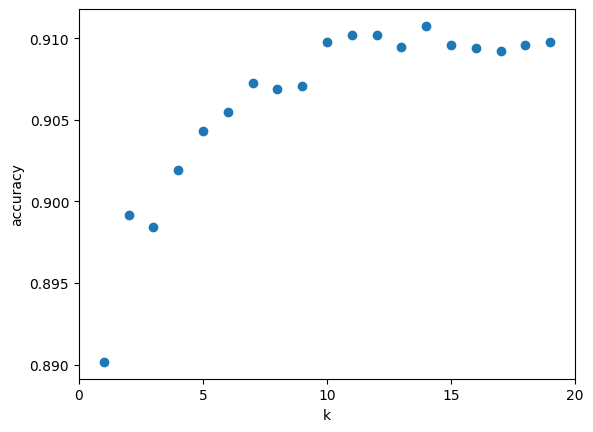

In [101]:
#Crearemos una gráfica para determnar cual será la K que escogeremos
k_range = range(1, 20)
scores = []
for k in k_range:
      knn = KNeighborsClassifier(n_neighbors = k)
      knn.fit(X_train, y_train)
      scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

### Tras observar la gráfica escogeremos el valor 14 ya que es el que mas accuracy posee

## 6. Predicciones

In [102]:
#Ahora realizaremos las predicciones
x_test = df_credit_test.values

predictions_test = clf.predict(x_test)

#Creamos una nueva columna en el dataframe con las predicciones
df_credit_test['Predictions'] = predictions_test

#Mostramos el dataframe
df_credit_test



,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,Predictions
0,30,1,1,2,0,2,0,0,6,487,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,7,2,3,0,0,0,1,6,346,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0
2,25,7,1,3,0,2,0,1,4,227,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1,0
3,38,7,1,2,0,1,1,1,4,17,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1,0
4,47,0,1,6,0,2,0,0,7,58,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,0,1,1,0,2,2,0,3,53,1,999,0,1,1.4,93.918,-42.7,4.958,5228.1,0
4115,39,0,1,3,0,2,0,1,3,219,1,999,0,1,1.4,93.918,-42.7,4.959,5228.1,0
4116,27,8,2,3,0,0,0,0,6,64,2,999,1,0,-1.8,92.893,-46.2,1.354,5099.1,0
4117,58,0,1,3,0,0,0,0,1,528,1,999,0,1,1.4,93.444,-36.1,4.966,5228.1,0


## 7. Visualización

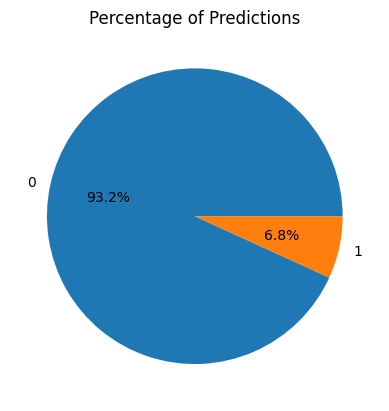

In [103]:
delivery_counts = df_credit_test['Predictions'].value_counts()
delivery_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentage of Predictions')
plt.ylabel('')
plt.show()


### Se puede observar como la gran basta mayoría de las personas no aceptaron la suscripción al crédito y solo un 6.8% si acepto la subscripción

# 3º Random Forest

### Creación del modelo

In [104]:
crf = RandomForestClassifier(n_estimators=100, criterion='gini', max_features='sqrt' , max_samples=400, random_state=2)

### Entrenamiento del modelo

In [105]:
#Ya utilizamos los x e y de los modelos anteriores
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [106]:
crf.fit(x_train, y_train)

RandomForestClassifier(max_samples=400, random_state=2)

### Visualización

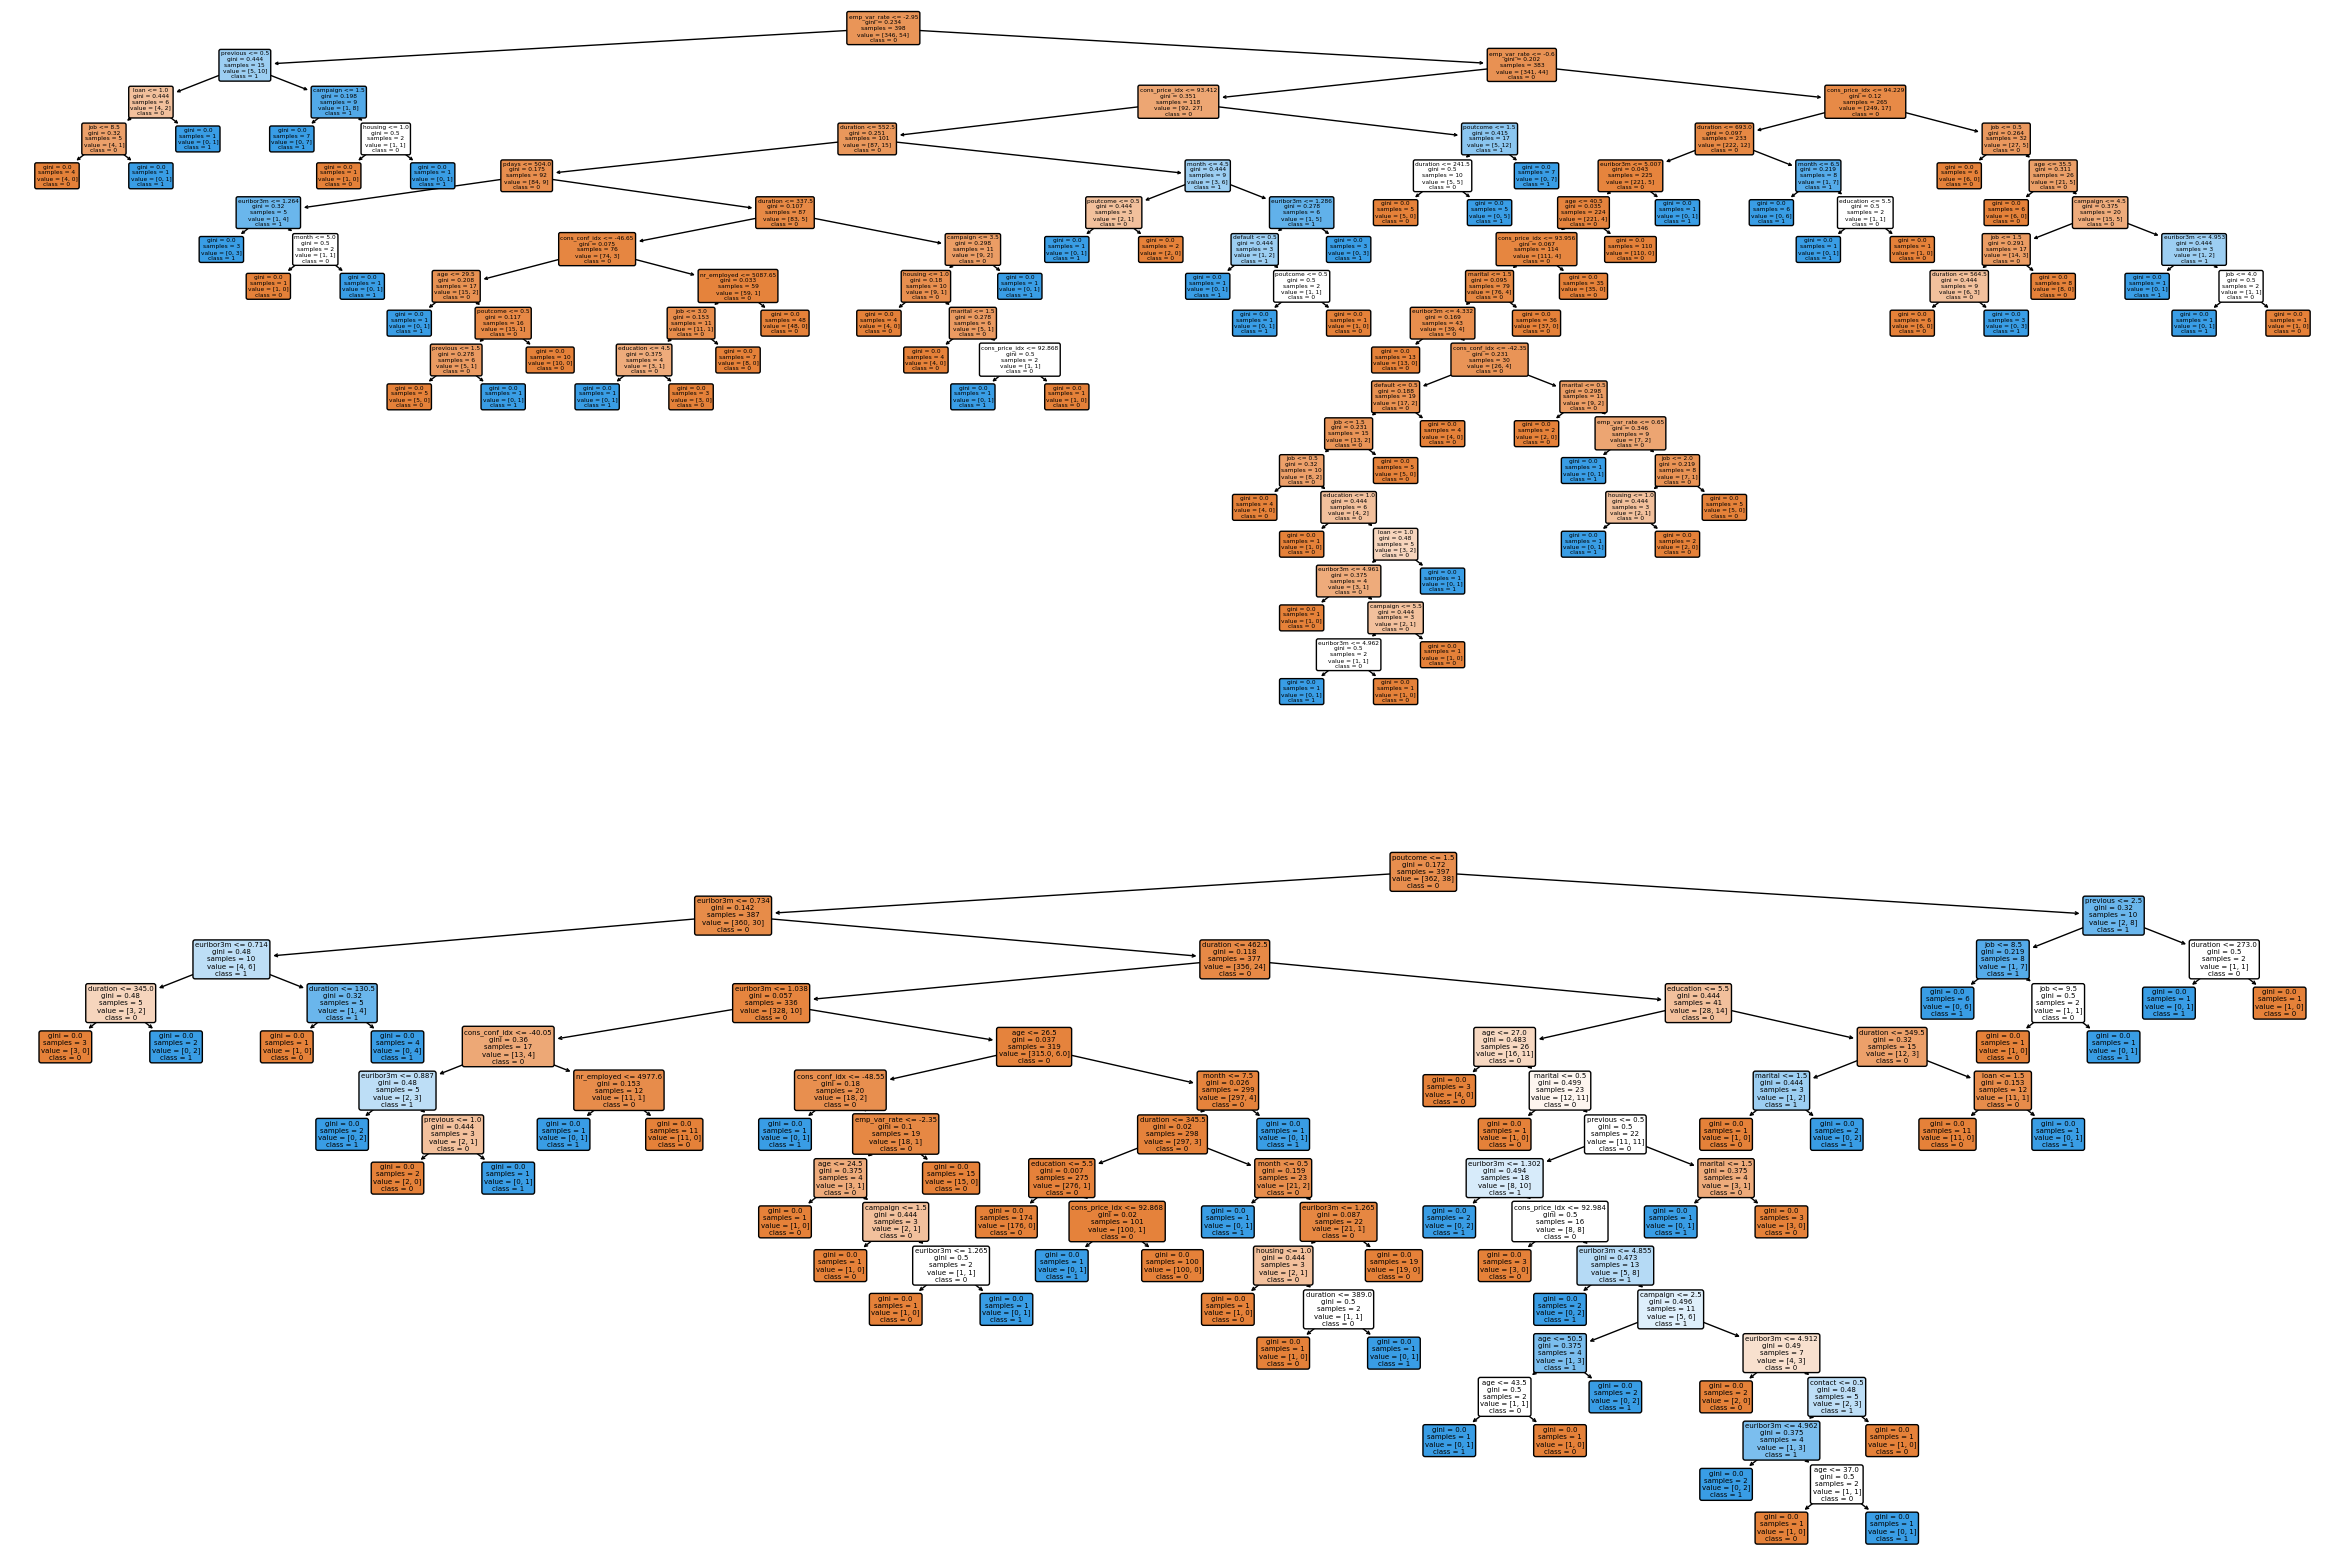

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [107]:
fig, axes = plt.subplots(2,1, figsize=(30,20))

for i in range(len(axes)):
  fig = plt.figure()
  plot_tree(crf.estimators_[i],
            feature_names=['age','job','marital','education','default','housing','loan','contact','month','duration','campaign','pdays','previous','poutcome','emp_var_rate','cons_price_idx','cons_conf_idx','euribor3m','nr_employed'],
            class_names=['0','1'],
            filled=True,
            impurity=True,
            rounded=True,
            ax=axes[i])
plt.show()

In [108]:
print("Precisión en conjunto de datos de entrenamiento: {:.3f}".format(crf.score(x_train, y_train)))
print("Precisión en el conjunto de datos de evaluación: {:.3f}".format(crf.score(x_test, y_test)))

Precisión en conjunto de datos de entrenamiento: 0.912
Precisión en el conjunto de datos de evaluación: 0.909


### Podemos observar como el algoritmo nos proporciona una precisón bastante aceptable

## Conclusiones del Proyecto

### Tras realizar las predicciones con cada uno de los algoritmos podemos llegar a varias conclusiones:


 #### 1- De todos los algoritmos que hemos utilizado el random forest es el que peor en lo referente a visibilidad y optimización ya que al mostrarse una gráfica tan grande se dificulta su visualización a diferencia de el algoritmo Knn y regrsión logística.

####  2- Todos los algoritmos genran scores bastantes parecidos, lo cual significa que en temas de precisión matemática los tres son aptos para su tilización.

#### 3- El algortimo de Knn y regresión logística son bastante semejantes a la hora de los resultados ya que ambos dan una predicción de si la persona aceptó el crédito o no dando una respuesta de 0 (Si no aceptó) o 1 (Si aceptó)

#### 4- Sin embargo al mirar los resultados en una gráfica podemos ver una clara diferncia de resultados

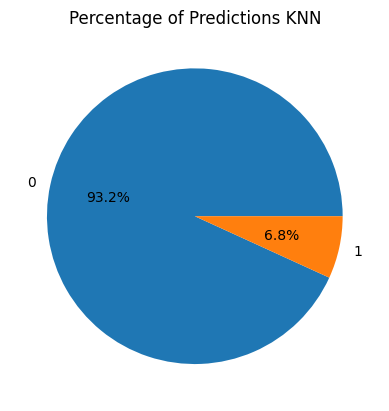

In [109]:
delivery_counts = df_credit_test['Predictions'].value_counts()
delivery_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentage of Predictions KNN')
plt.ylabel('')
plt.show()


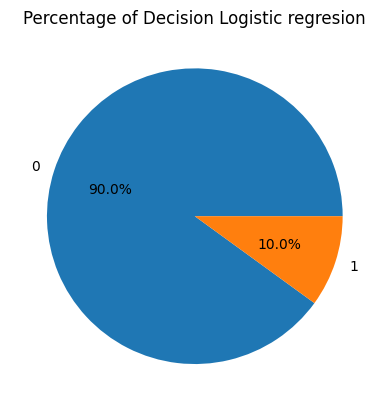

In [110]:
delivery_counts = new_df['Decision'].value_counts()
delivery_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentage of Decision Logistic regresion')
plt.ylabel('')
plt.show()


#### -Como se observa en estas gráficas hay una diferencia de un 3% de los porcentajes de los que aceptaron el crédito. Esto se debe a que en la Regresión logística se realizó con un umbral del 0.5, si se llegase a aumentar el umbral esta diferencia bajaría o aumentaria si se llegase a pasar de cierto margen